In [81]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [41]:
data = pd.read_excel('medical_data_prepro_ver1.xlsx',sheet_name = 'Sheet1')
data

,Patient,Diagnosis,Date,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgM,...,Monocyte(#),Monocyte(%),Neutrophil(#),Neutrophil(%),ESR,CRP,CMV PCR[EYE],HSV type I PCR[EYE],HSV type II PCR[EYE],VZV PCR[EYE]
0,4024186,1,2019-02-18,0,33,NaN,NaN,NaN,NaN,NaN,...,0.56,6.9,9.49,91.8,16.0,8.8,250,0.0,1.0,0.0
1,10001829,0,2020-06-15,0,65,NaN,NaN,NaN,NaN,NaN,...,0.4,9.1,1.8,NaN,30.0,1.4,NaN,NaN,NaN,NaN
2,10002333,0,2020-08-29,0,59,NaN,NaN,NaN,NaN,NaN,...,0.41,7.5,2.98,54.8,NaN,NaN,NaN,NaN,NaN,NaN
3,10003076,0,2022-01-18,0,67,NaN,NaN,NaN,NaN,NaN,...,0.52,6.5,6.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10003076,0,2021-12-28,0,67,NaN,NaN,NaN,NaN,NaN,...,0.72,9.7,5.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,9996860,0,2020-10-15,0,8,NaN,NaN,NaN,NaN,NaN,...,0.37,5.3,3.73,53.6,17.0,0.7,NaN,NaN,NaN,NaN
9735,9996860,0,2020-08-11,0,8,NaN,NaN,NaN,NaN,NaN,...,0.48,6.9,4,57.5,15.0,2.0,NaN,NaN,NaN,NaN
9736,9996860,0,2020-07-10,0,8,NaN,NaN,NaN,NaN,NaN,...,0.6,7.1,5.09,60.0,19.0,1.1,NaN,NaN,NaN,NaN
9737,9996860,0,2020-06-09,0,8,NaN,NaN,NaN,NaN,NaN,...,0.28,3.4,8.24,81.1,84.0,22.2,NaN,NaN,NaN,NaN


In [42]:
data.isnull().sum()

Patient                    0
Diagnosis                  0
Date                       0
Gender                     0
Age                        0
CMV IgM                 8818
CMV IgG                 8834
HSV IgM                 8754
HSV IgG                 9026
VZV IgM                 8887
VZV IgG                 8887
WBC COUNT                459
Lymphocyte(#)            805
Lymphocyte(%)            805
Monocyte(#)              805
Monocyte(%)              805
Neutrophil(#)            805
Neutrophil(%)           2556
ESR                     4786
CRP                     4926
CMV PCR[EYE]            9512
HSV type I PCR[EYE]     9568
HSV type II PCR[EYE]    9583
VZV PCR[EYE]            9598
dtype: int64

In [53]:
data.columns

Index(['Patient', 'Diagnosis', 'Date', 'Gender', 'Age', 'CMV IgM', 'CMV IgG',
       'HSV IgM', 'HSV IgG', 'VZV IgM', 'VZV IgG', 'WBC COUNT',
       'Lymphocyte(#)', 'Lymphocyte(%)', 'Monocyte(#)', 'Monocyte(%)',
       'Neutrophil(#)', 'Neutrophil(%)', 'ESR', 'CRP', 'CMV PCR[EYE]',
       'HSV type I PCR[EYE]', 'HSV type II PCR[EYE]', 'VZV PCR[EYE]'],
      dtype='object')

In [54]:
data.shape

(9739, 24)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient               9739 non-null   int64  
 1   Diagnosis             9739 non-null   int64  
 2   Date                  9739 non-null   object 
 3   Gender                9739 non-null   int64  
 4   Age                   9739 non-null   int64  
 5   CMV IgM               921 non-null    float64
 6   CMV IgG               905 non-null    float64
 7   HSV IgM               985 non-null    float64
 8   HSV IgG               713 non-null    float64
 9   VZV IgM               852 non-null    object 
 10  VZV IgG               852 non-null    float64
 11  WBC COUNT             9280 non-null   float64
 12  Lymphocyte(#)         8934 non-null   float64
 13  Lymphocyte(%)         8934 non-null   float64
 14  Monocyte(#)           8934 non-null   object 
 15  Monocyte(%)          

## 상관분석
두 변수간에 어떤 선형적인 관계를 가지고 있는지를 분석하는 방법입니다. 이때 두 변수간의 관계의 강도를 상관관계(Correlation coefficient)라고 합니다.

상관계수는 두 변수간의 연관된 정도만 나타낼 뿐 원인 결과를 나타내는 인과관계를 설명하는 것은 아님을 반드시 알아야합니다.

상관관계 분석에서는 기본적 방법으로 피어슨 상관계수를 많이 이용합니다.

In [56]:
data.corr()

,Patient,Diagnosis,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgG,WBC COUNT,Lymphocyte(#),Lymphocyte(%),Monocyte(%),Neutrophil(%),ESR,CRP,HSV type I PCR[EYE],HSV type II PCR[EYE],VZV PCR[EYE]
Patient,1.000000,-0.000694,0.029361,-0.080519,0.070831,-0.169933,0.115539,-0.196447,-0.069636,-0.002251,-0.027862,-0.023218,0.033820,0.008255,-0.139962,0.012792,-0.052053,0.053727,-0.083132
Diagnosis,-0.000694,1.000000,0.088284,0.033570,0.345841,0.344254,0.134588,-0.159225,-0.006714,-0.082851,-0.107504,0.126724,0.192361,-0.064964,0.119862,0.201016,-0.001256,-0.006814,0.212986
Gender,0.029361,0.088284,1.000000,-0.052068,0.100885,0.054029,-0.037171,0.000456,-0.054119,0.045286,0.036082,-0.040830,0.081250,0.006299,-0.200068,0.043732,0.089474,-0.116872,-0.103506
Age,-0.080519,0.033570,-0.052068,1.000000,0.076215,0.148836,0.096317,0.060084,0.058170,-0.035978,-0.045262,0.026959,0.105691,-0.034708,0.174276,0.097769,-0.112576,-0.139841,0.126540
CMV IgM,0.070831,0.345841,0.100885,0.076215,1.000000,-0.124266,0.324741,-0.224778,-0.244226,-0.134755,-0.215992,-0.218951,0.040378,0.026215,0.028431,0.042050,-0.033460,-0.036489,-0.101339
CMV IgG,-0.169933,0.344254,0.054029,0.148836,-0.124266,1.000000,-0.084335,0.278443,-0.055101,-0.079392,0.017974,0.166879,0.055129,-0.009970,0.099446,0.071366,-0.059188,-0.039264,0.356724
HSV IgM,0.115539,0.134588,-0.037171,0.096317,0.324741,-0.084335,1.000000,-0.375610,-0.052570,-0.066002,-0.041397,0.068205,0.105256,-0.076373,-0.097270,0.050820,NaN,NaN,-0.437061
HSV IgG,-0.196447,-0.159225,0.000456,0.060084,-0.224778,0.278443,-0.375610,1.000000,-0.002951,0.039007,0.031294,-0.060566,-0.010077,0.031249,0.113213,0.005719,NaN,NaN,0.499613
VZV IgG,-0.069636,-0.006714,-0.054119,0.058170,-0.244226,-0.055101,-0.052570,-0.002951,1.000000,0.076215,0.006321,-0.004731,0.040225,0.061529,0.175227,0.121095,NaN,NaN,0.307932
WBC COUNT,-0.002251,-0.082851,0.045286,-0.035978,-0.134755,-0.079392,-0.066002,0.039007,0.076215,1.000000,0.262737,-0.208036,-0.070005,0.377172,0.136650,0.199722,-0.015800,0.220814,-0.047768


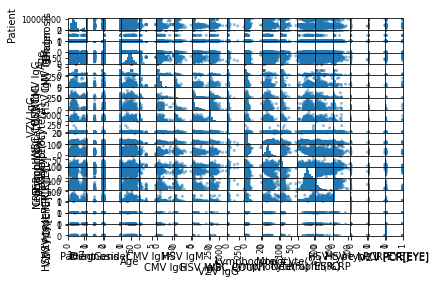

In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

### Stratified Shuffle Split은 Stratified K Fold(계층 샘플링)와 Shuffle Split(랜덤 샘플링)의 기능을 합친 것

In [63]:
data

,Patient,Diagnosis,Date,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgM,...,Monocyte(#),Monocyte(%),Neutrophil(#),Neutrophil(%),ESR,CRP,CMV PCR[EYE],HSV type I PCR[EYE],HSV type II PCR[EYE],VZV PCR[EYE]
0,4024186,1,2019-02-18,0,33,NaN,NaN,NaN,NaN,NaN,...,0.56,6.9,9.49,91.8,16.0,8.8,250,0.0,1.0,0.0
1,10001829,0,2020-06-15,0,65,NaN,NaN,NaN,NaN,NaN,...,0.4,9.1,1.8,NaN,30.0,1.4,NaN,NaN,NaN,NaN
2,10002333,0,2020-08-29,0,59,NaN,NaN,NaN,NaN,NaN,...,0.41,7.5,2.98,54.8,NaN,NaN,NaN,NaN,NaN,NaN
3,10003076,0,2022-01-18,0,67,NaN,NaN,NaN,NaN,NaN,...,0.52,6.5,6.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10003076,0,2021-12-28,0,67,NaN,NaN,NaN,NaN,NaN,...,0.72,9.7,5.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,9996860,0,2020-10-15,0,8,NaN,NaN,NaN,NaN,NaN,...,0.37,5.3,3.73,53.6,17.0,0.7,NaN,NaN,NaN,NaN
9735,9996860,0,2020-08-11,0,8,NaN,NaN,NaN,NaN,NaN,...,0.48,6.9,4,57.5,15.0,2.0,NaN,NaN,NaN,NaN
9736,9996860,0,2020-07-10,0,8,NaN,NaN,NaN,NaN,NaN,...,0.6,7.1,5.09,60.0,19.0,1.1,NaN,NaN,NaN,NaN
9737,9996860,0,2020-06-09,0,8,NaN,NaN,NaN,NaN,NaN,...,0.28,3.4,8.24,81.1,84.0,22.2,NaN,NaN,NaN,NaN


In [72]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 2022)

for train_idx, test_idx in split.split(data,data['Diagnosis']):
    train = data.loc[train_idx]
    test = data.loc[test_idx]

for train_idx, val_idx in split.split(data,data['Diagnosis']):
    train = data.loc[train_idx]
    val = data.loc[val_idx]

print(data['Diagnosis'].value_counts()/len(data))
print(train['Diagnosis'].value_counts()/len(train))
print(test['Diagnosis'].value_counts()/len(test))
print(val['Diagnosis'].value_counts()/len(val))


0    0.888182
2    0.096416
1    0.015402
Name: Diagnosis, dtype: float64
0    0.888204
2    0.096393
1    0.015402
Name: Diagnosis, dtype: float64
0    0.888090
2    0.096509
1    0.015400
Name: Diagnosis, dtype: float64
0    0.888090
2    0.096509
1    0.015400
Name: Diagnosis, dtype: float64


imbalanced data set

In [76]:
def print_class_num(df, label_name):            # 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_0 = len(df.query(label_name + ' == 0'))   # label로 0을 사용하는 열 개수
  n_1 = len(df.query(label_name + ' == 1'))   # label로 1을 사용하는 열 개수
  n_2 = len(df.query(label_name + ' == 2'))   # label로 2을 사용하는 열 개수
 

  print("NIU (0) : {}개, {:.2f}%".format(n_0, n_0*100/n_total))
  print("ARN (1) : {}개, {:.2f}%\n".format(n_1, n_1*100/n_total))
  print("CMV (2) : {}개, {:.2f}%\n".format(n_2, n_2*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트 
  values.plot(kind='bar')
  print(values)

NIU (0) : 6920개, 88.82%
ARN (1) : 120개, 1.54%

CMV (2) : 751개, 9.64%

0    6920
2     751
1     120
Name: Diagnosis, dtype: int64


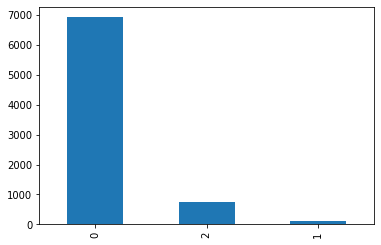

In [77]:
print_class_num(train,'Diagnosis')

In [78]:
count_Diagnosis = train.groupby('Diagnosis').count()
count_Diagnosis

,Patient,Date,Gender,Age,CMV IgM,CMV IgG,HSV IgM,HSV IgG,VZV IgM,VZV IgG,...,Monocyte(#),Monocyte(%),Neutrophil(#),Neutrophil(%),ESR,CRP,CMV PCR[EYE],HSV type I PCR[EYE],HSV type II PCR[EYE],VZV PCR[EYE]
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,6920,6920,6920,6920,617,592,647,487,565,559,...,6356,6356,6356,5077,3704,3526,90,88,77,76
1,120,120,120,120,39,40,22,21,22,22,...,106,106,106,78,53,49,24,25,25,27
2,751,751,751,751,80,93,126,66,97,100,...,691,691,691,601,232,304,65,22,21,11
